# **The Sparks Foundation**

## Data Science and Business Analytics Internship

## Task-1 Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours using Python/R/SAS

### **Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Reading File**

In [ ]:
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
# Using describe method we'll be able to see min, max, mean, std, count, of given dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Using info we'll be able to see summary of data
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Visualizing the data**

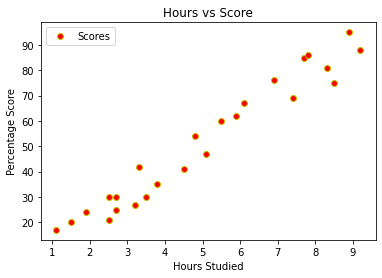

In [ ]:
dataset.plot(x = "Hours", y = "Scores", style = "o", c = "r", ms = 6, mec = "y")
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


### **Dividing Data into Attributes and Labels**

In [ ]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

### **Splitting dataset into training and testing set**

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### **Plotting the regression line**

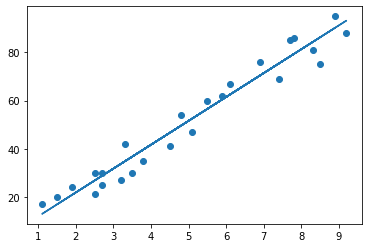

In [ ]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Comparing Actual vs Predicted**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


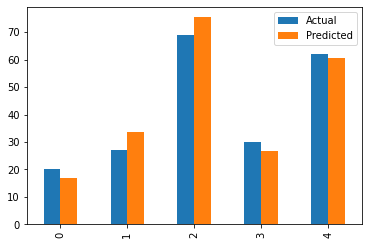

In [ ]:
df.plot(kind = 'bar')

### **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
